### Comparison runtimes of Decision Tree Model & Random Forest Model using wine quality data

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import time

In [4]:
# Load red wine quality data from before.
df = pd.read_csv('winequality-red.csv', delimiter=',')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Set up variables into different dataframes for model input 
X = df.drop(columns='quality')
Y = df['quality']

## Decision Tree

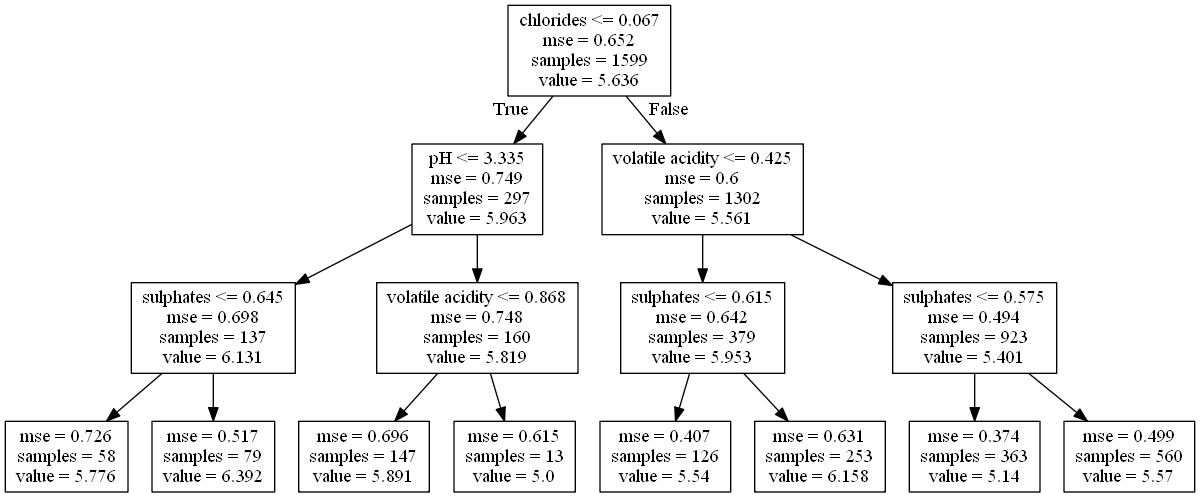

In [7]:
# Import model
from sklearn import tree

# Help display visualizations
from IPython.display import Image

# Packages for rendering tree
import pydotplus
from pydotplus import graphviz

# Initialize and train tree
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3 # roughly n features divided by 3
)

regressor_tree.fit(X, Y)

# Render tree
dot_data = tree.export_graphviz(
    regressor_tree, out_file=None,
    feature_names=X.columns,
    class_names=Y,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
# Cross validation 
from sklearn.model_selection import cross_val_score
tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('Mean:', tree_score.mean(), '\nVariance:', tree_score.std()*2)

Mean: 0.10973074584672864 
Variance: 0.16107145312872037


## Random Forest

In [9]:
# Import model
from sklearn import ensemble

# Initialize and cross-validate forest
forest_regression = ensemble.RandomForestClassifier(
    max_depth=2,
    max_features=3
)

forest_score = cross_val_score(forest_regression, X, Y, cv=5)
print('Mean:', forest_score.mean(), '\nVariance:', forest_score.std()*2)

Mean: 0.5574235597924059 
Variance: 0.09539035811391826


## Runtime

In [11]:
# Test runtime of Tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=4,
    max_features=3
)

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.04964637756347656


In [12]:
# Test runtime of Forest

start = time.time()

forest_regression = ensemble.RandomForestClassifier(
    max_depth=4,
    max_features=3
)

forest_score = cross_val_score(forest_regression, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.192244291305542


In [13]:
print('Forest is', round(forest_time/tree_time, 2), 'times slower than the tree')

Forest is 3.87 times slower than the tree
